In [5]:
import sys
sys.path.append("./src")


In [6]:
from models.imagegen_model import StabilityAIImageGen

endpoint = ...
#endpoint = ...
token = ...
model_name = "sd3-turbo"

imagegen_model = StabilityAIImageGen(endpoint=endpoint, token=token, model_name=model_name)

In [13]:
img = imagegen_model.predict(prompt = "A young man with short, messy black hair and piercing blue eyes, wearing a worn leather armor set with a silver badge on his chest, standing in a heroic pose with his right hand holding a long sword and his left hand summoning a gust of wind.", style_preset = "3d-model")

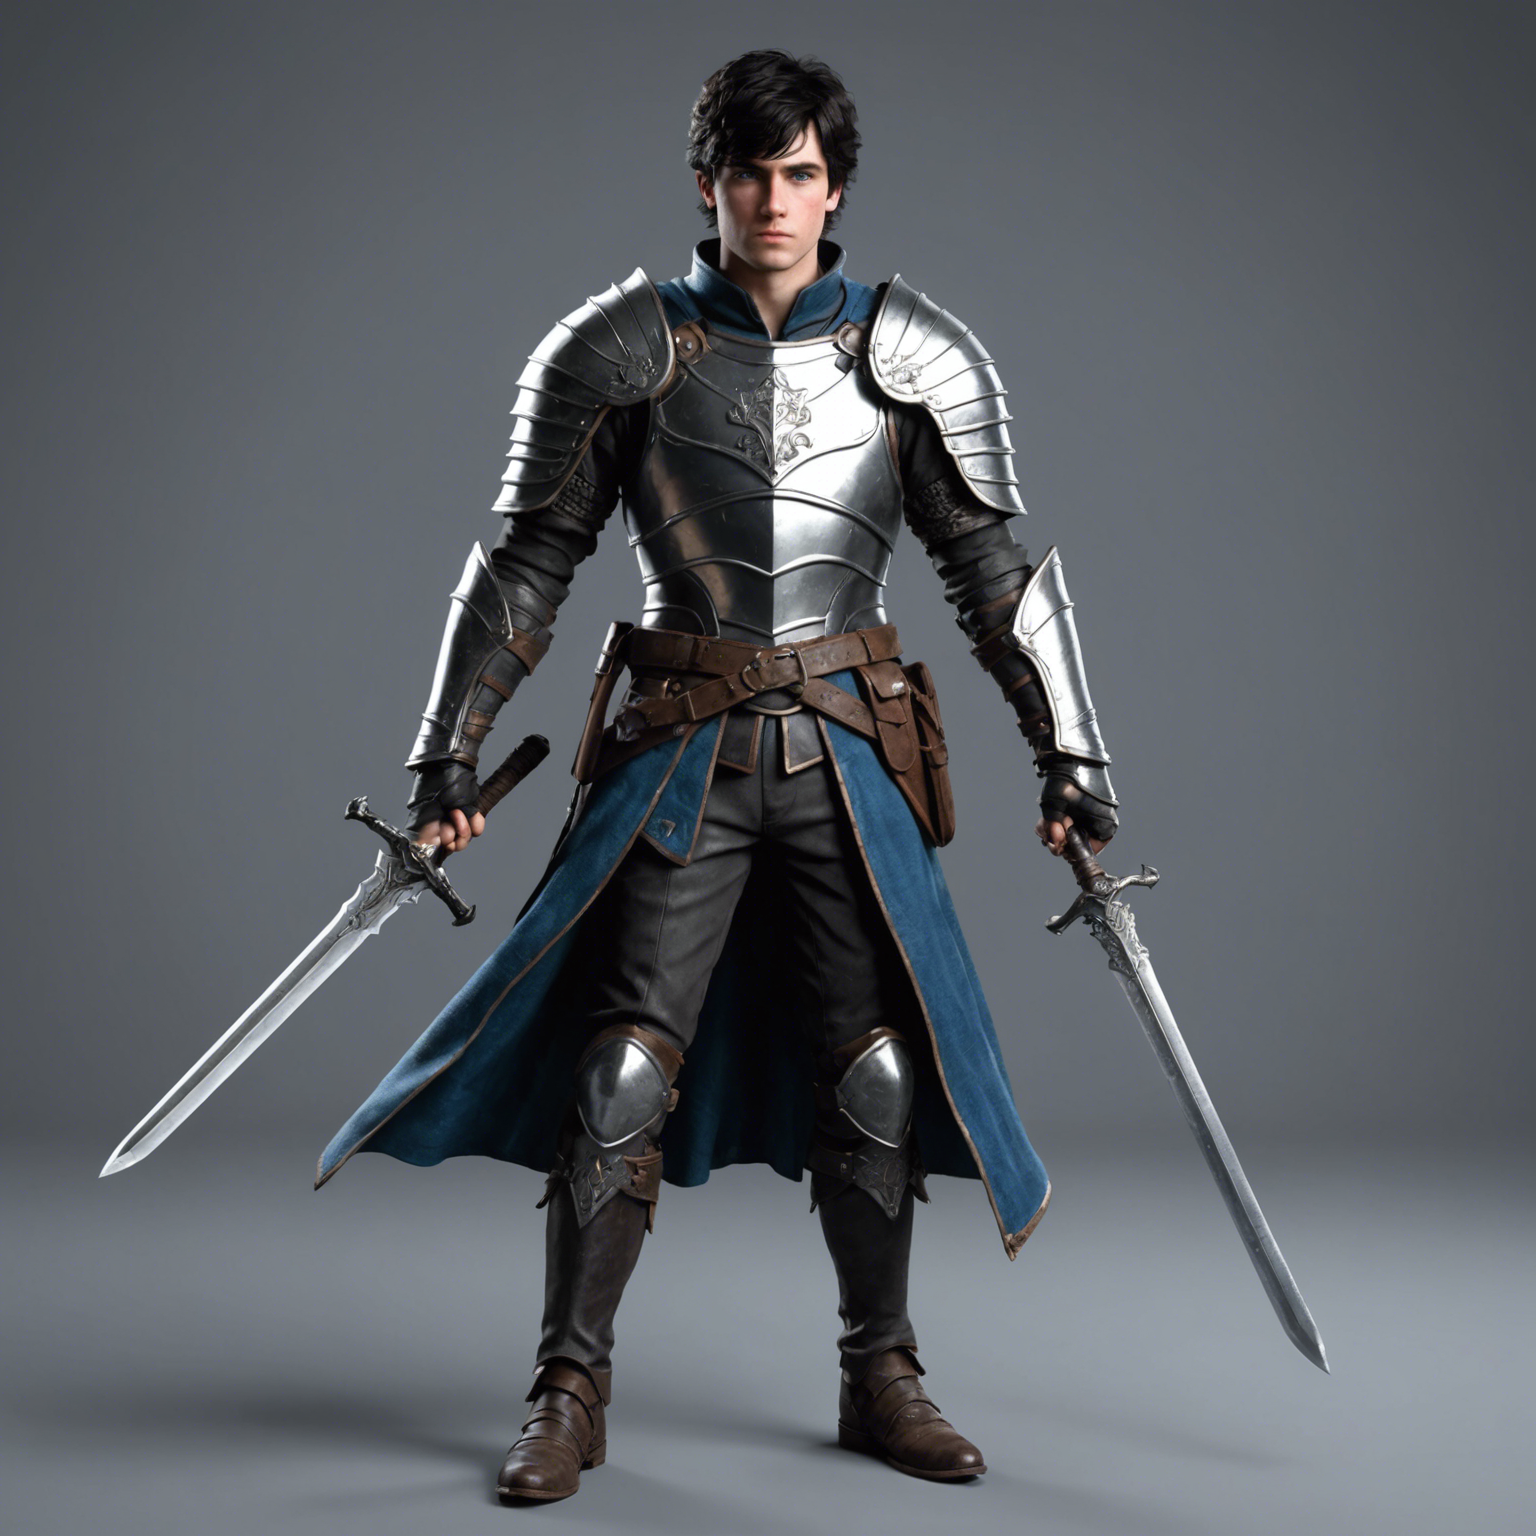

In [14]:
display(img)

In [3]:

from models.embedding_model import AzureAIEmbedding

endpoint = ...
token = ...
model_name = "cohere-v3-multilingual-01"

embeddings_model = AzureAIEmbedding(endpoint=endpoint, token=token, model_name=model_name)

In [4]:
embeddings = embeddings_model.predict(["hi"])

In [5]:
embeddings

array([[ 3.0398369e-06,  2.8121948e-02,  6.2294006e-03, ...,
         3.2775880e-02,  2.2106170e-03, -2.0172120e-02]])

In [6]:
from models.chatcomplete_model import AzureAIChatComplete

In [7]:

endpoint = ...
token = ...
model_name = "Meta-Llama-3-8B-Instruct-abzad"

endpoint = ...
token = ...
model_name = "Meta-Llama-3-70B-Instruct-wcukf"

chatcomplete_model = AzureAIChatComplete(endpoint=endpoint, token=token, model_name=model_name)

In [8]:
chatcomplete_model.predict(messages=[{"role": "system", "content": "You are an AI agent trying to help the user."}, {"role": "user", "content": "hi, who is Kaladin?"}], max_tokens=10, temperature=0)

{'id': 'cmpl-e99234c70c1347cb948c749f013b38ac',
 'object': 'chat.completion',
 'created': 1715524842,
 'model': 'Meta-Llama-3-70B-Instruct',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': 'Kaladin is a main character in the Stormlight',
    'tool_calls': None},
   'finish_reason': 'length',
   'logprobs': None,
   'stop_reason': None}],
 'usage': {'prompt_tokens': 33, 'total_tokens': 43, 'completion_tokens': 10}}

In [14]:
system_prompt = """
You are an assistant with access to the following functions.

FUNC_SEARCH_DATA = {
        "name": "ask_data",
        "description": "Función auxiliar para buscar datos y resolver preguntas."
        + "Peticiones de datos agregados o porcentajes se pueden resolver haciendo varias preguntas por separado.",
        "parameters": {
            "type": "object",
            "properties": {
                "search_queries": {
                    "type": "array",
                    "items": {"type": "string"},
                    "minItems": 1,
                    "maxItems": 5,
                    "description": "Lista de preguntas. Cada elemento de la lista debe ser una pregunta con el formato adecuado."
                    + "Por ejemplo: ['¿Cuántos coches hay en España?']",
                }
            },
            "required": ["search_queries"],
        },
    }

FUNC_CREATE_IMAGE = {
        "name": "create_image",
        "description": "Función auxiliar para generar imágenes a partir de una descripción con un modelo de inteligencia artificial como Dalle."
        "parameters": {
            "type": "object",
            "properties": {
                "prompt_description": {
                    "type": "string",
                    "description": "Descripción de la imagen que se debe generar con el modelo de IA.",
                }
            },
            "required": ["prompt_description"],
        },
    }

When a function is needed generate only a valid JSON with the format:
{ 
    "function_name": "name of the function"
    "parameters": [
                "parameter1": "value of the parameter",
                "parameter2": "value of the parameter",
                ...
                ]
}

Prioritize answering with functions rather than generating general answers.
"""

In [15]:
response = chatcomplete_model.predict(messages=[{"role": "system", "content": system_prompt}, {"role": "user", "content": "Cómo es Kaladin?"}], temperature=0.4)

In [16]:
response["choices"][0]["message"]["content"]

'{\n    "function_name": "ask_data",\n    "parameters": {\n        "search_queries": ["¿Quién es Kaladin?", "Kaladin Stormlight Archive"]\n    }\n}'

In [17]:
import json
json.loads(response["choices"][0]["message"]["content"])

{'function_name': 'ask_data',
 'parameters': {'search_queries': ['¿Quién es Kaladin?',
   'Kaladin Stormlight Archive']}}

In [18]:
response = chatcomplete_model.predict(messages=[{"role": "system", "content": system_prompt}, {"role": "user", "content": "Me gustaría crear una imagen de Kaladin hablando con Shallan"}], temperature=0.4)

In [19]:
json.loads(response["choices"][0]["message"]["content"])

{'function_name': 'create_image',
 'parameters': {'prompt_description': 'Kaladin, un guerrero de la orden de los Portadores del Viento, hablando con Shallan, una joven y hermosa princesa, en un entorno de fantasía'}}

In [20]:
response = chatcomplete_model.predict(messages=[{"role": "system", "content": system_prompt}, {"role": "user", "content": "Dame información descriptiva sobre Adolin y Kaladin"}], temperature=0.4)

In [21]:
json.loads(response["choices"][0]["message"]["content"])

{'function_name': 'ask_data',
 'parameters': {'search_queries': ['¿Quién es Adolin en la saga de El archivo de las tormentas?',
   '¿Quién es Kaladin en la saga de El archivo de las tormentas?']}}

In [ ]:
response = chatcomplete_model.predict(messages=[{"role": "system", "content": system_prompt}, {"role": "user", "content": "Dame información descriptiva sobre Adolin y Kaladin"}], temperature=0.4)